In [1]:
# importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, precision_recall_curve
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Supress the warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

# Data Loading & Inspection

In [4]:
df = pd.read_csv("Leads.csv")

In [5]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
df.shape

(9240, 37)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Exploratory Data Analysis

### Checking the duplicates 

In [9]:
df[df.duplicated()]

## No duplicate found

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


### Missing value treatment

###### As we can observe from the data that there are select values for many column. This is because customer did not choose any option from the list, hence it shows select. Select values are as good as NULL.

In [10]:
df = df.replace('Select',np.nan)

In [11]:
df.isnull().sum().sort_values(ascending = False)

How did you hear about X Education               7250
Lead Profile                                     6855
Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Activity Index                      4218
Asymmetrique Profile Index                       4218
City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [12]:
round(100*(df.isnull().sum()/len(df)), 2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

##### We can drop the coulmns having null values more than 70%.

In [13]:
df.drop('How did you hear about X Education', axis = 1, inplace = True)
df.drop('Lead Profile', axis = 1, inplace = True)

#### All these scoring variables are aquired after the evaluation which means they won't be available for the model

In [14]:
df.drop('Lead Quality', axis = 1, inplace = True)
df.drop('Tags', axis = 1, inplace = True)
df.drop('Asymmetrique Profile Score', axis = 1, inplace = True)
df.drop('Asymmetrique Activity Score', axis = 1, inplace = True)
df.drop('Asymmetrique Activity Index', axis = 1, inplace = True)
df.drop('Asymmetrique Profile Index', axis = 1, inplace = True)

In [15]:
df.shape

(9240, 29)

## Univariate Analysis

In [16]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

#### Drop the feature as it is highly skewed towards one item

In [17]:
df.drop('What matters most to you in choosing a course', axis = 1, inplace = True) 

In [18]:
df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [19]:
## This feature is having null values. This can be replaced with high frequesncy value which is 'Unemployed'
df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan,'Unemployed')

In [20]:
df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

#### Drop the feature Country as it is highly skewed towards one item

In [21]:
df.drop('Country', axis=1, inplace=True)

In [22]:
df['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [23]:
### Impute the missing values with the most frequent value.

In [24]:
df['Specialization'][pd.isnull(df['Specialization'])] = df['Specialization'].mode()[0]

In [25]:
df['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [26]:
### Impute the missing values with the most frequent value as there is one clearly.

In [27]:
df['City'] = df['City'].replace(np.nan,'Mumbai')

In [28]:
df['Page Views Per Visit'].describe(percentiles =([0.25,0.5,0.75,0.9,0.95,0.99,1]) )

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
100%       55.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

#### Drop the missing rows as it is very less in numbers

In [29]:
df = df[~np.isnan(df['Page Views Per Visit'])]

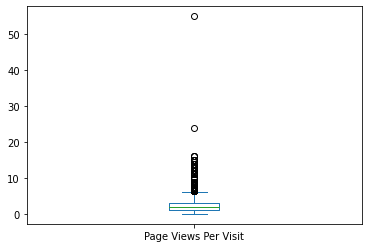

In [30]:
df['Page Views Per Visit'].plot.box()
plt.show()

#### Capping the outliers

In [31]:
df['Page Views Per Visit'][df['Page Views Per Visit'] > 15] = 16

In [32]:
df['Page Views Per Visit'].describe()

count    9103.000000
mean        2.357657
std         2.087277
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

In [33]:
df['TotalVisits'].describe(percentiles =([0.25,0.5,0.75,0.9,0.95,0.99,1]) )

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
100%      251.000000
max       251.000000
Name: TotalVisits, dtype: float64

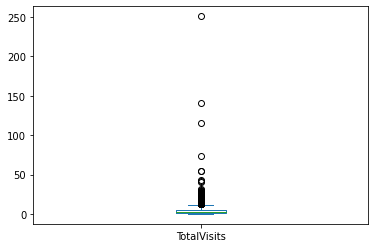

In [34]:
df['TotalVisits'].plot.box()
plt.show()

In [35]:
df = df[~np.isnan(df['TotalVisits'])]

In [36]:
df['TotalVisits'][df['TotalVisits'] >= 17] = 17

In [37]:
df['TotalVisits'].describe()

count    9103.000000
mean        3.332747
std         3.252420
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        17.000000
Name: TotalVisits, dtype: float64

In [38]:
df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2738
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      61
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [39]:
#replacing nan Values with mode value "Email Opened"

df['Last Activity'] = df['Last Activity'].replace(np.nan,'Email Opened')

In [40]:
#combining low frequency values
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                       'Had a Phone Conversation', 
                                                       'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Visited Booth in Tradeshow',
                                                         'Resubscribed to emails'],'Others')

In [41]:
df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [42]:
df['Lead Source'] = df['Lead Source'].replace(np.nan,'Google')

##### Treat the case sensitivity with 'google'
##### All the levels with occurance less than 50 - group them to 'Others'

In [43]:
df['Lead Source'].replace('google', 'Google', inplace=True)

In [44]:
df['Lead Source'] = df['Lead Source'].replace(['Facebook','bing','Click2call','Press_Release','Social Media','Live Chat','youtubechannel','testone','Pay per Click Ads','welearnblog_Home','WeLearn','blog','NC_EDM'],'Others')

In [45]:
df['Lead Source'].value_counts()

Google              2902
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Others                54
Name: Lead Source, dtype: int64

In [46]:
df.isnull().sum().sort_values(ascending = False)

Prospect ID                                 0
Magazine                                    0
A free copy of Mastering The Interview      0
I agree to pay the amount through cheque    0
City                                        0
Get updates on DM Content                   0
Update me on Supply Chain Content           0
Receive More Updates About Our Courses      0
Through Recommendations                     0
Digital Advertisement                       0
Newspaper                                   0
X Education Forums                          0
Newspaper Article                           0
Search                                      0
Lead Number                                 0
What is your current occupation             0
Specialization                              0
Last Activity                               0
Page Views Per Visit                        0
Total Time Spent on Website                 0
TotalVisits                                 0
Converted                         

#### With this we have treated all the missing Values and its features

### Lets Handle all the other features 

In [47]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

##### 'Prospect ID' and 'Lead Number' both are unique identifiation number. So we can drop 'Prospect ID'

In [48]:
df.drop('Prospect ID', axis=1, inplace=True)

In [49]:
df['Lead Origin'].value_counts(normalize = True) *100

Landing Page Submission    53.674613
API                        39.305723
Lead Add Form               6.679117
Lead Import                 0.340547
Name: Lead Origin, dtype: float64

In [50]:
df['Do Not Email'].value_counts(normalize =True)*100

No     92.046578
Yes     7.953422
Name: Do Not Email, dtype: float64

In [51]:
df['Do Not Call'].value_counts(normalize =True)*100

No     99.978029
Yes     0.021971
Name: Do Not Call, dtype: float64

In [52]:
df['Search'].value_counts(normalize =True)*100

No     99.846205
Yes     0.153795
Name: Search, dtype: float64

In [53]:
df['Magazine'].value_counts(normalize =True)*100

No    100.0
Name: Magazine, dtype: float64

In [54]:
df['Newspaper Article'].value_counts(normalize =True)*100

No     99.978029
Yes     0.021971
Name: Newspaper Article, dtype: float64

In [55]:
df['X Education Forums'].value_counts(normalize=True)*100

No     99.989015
Yes     0.010985
Name: X Education Forums, dtype: float64

In [56]:
df['Digital Advertisement'].value_counts(normalize=True)*100

No     99.956058
Yes     0.043942
Name: Digital Advertisement, dtype: float64

In [57]:
df['Through Recommendations'].value_counts(normalize=True)*100

No     99.923102
Yes     0.076898
Name: Through Recommendations, dtype: float64

In [58]:
df['Receive More Updates About Our Courses'].value_counts(normalize=True)*100

No    100.0
Name: Receive More Updates About Our Courses, dtype: float64

In [59]:
df['Update me on Supply Chain Content'].value_counts(normalize=True)*100

No    100.0
Name: Update me on Supply Chain Content, dtype: float64

In [60]:
df['Get updates on DM Content'].value_counts(normalize=True)*100

No    100.0
Name: Get updates on DM Content, dtype: float64

In [61]:
df['I agree to pay the amount through cheque'].value_counts(normalize=True)*100

No    100.0
Name: I agree to pay the amount through cheque, dtype: float64

In [62]:
df['A free copy of Mastering The Interview'].value_counts(normalize=True)*100

No     68.274195
Yes    31.725805
Name: A free copy of Mastering The Interview, dtype: float64

#### Drop the above columns which are heavily skewed towrads one value i.e. more than 90%

In [63]:
df.drop('Do Not Email', axis=1, inplace=True)
df.drop('Do Not Call', axis=1, inplace=True)
df.drop('Search', axis=1, inplace=True)
df.drop('Magazine', axis=1, inplace=True)
df.drop('Newspaper Article', axis=1, inplace=True)
df.drop('X Education Forums', axis=1, inplace=True)
df.drop('Newspaper', axis=1, inplace=True)
df.drop('Digital Advertisement', axis=1, inplace=True)
df.drop('Through Recommendations', axis=1, inplace=True)
df.drop('Receive More Updates About Our Courses', axis=1, inplace=True)
df.drop('Update me on Supply Chain Content', axis=1, inplace=True)
df.drop('Get updates on DM Content', axis=1, inplace=True)
df.drop('I agree to pay the amount through cheque', axis=1, inplace=True)

In [64]:
df['A free copy of Mastering The Interview'] = df['A free copy of Mastering The Interview'].map({'Yes': 1, 'No': 0})

In [65]:
df['A free copy of Mastering The Interview'].value_counts()

0    6215
1    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [66]:
df['Total Time Spent on Website'].describe()

count    9103.000000
mean      481.350104
std       545.066142
min         0.000000
25%         9.000000
50%       244.000000
75%       919.500000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

<AxesSubplot:>

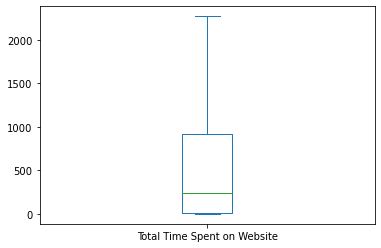

In [67]:
df['Total Time Spent on Website'].plot.box()

#### There are no outliers observed. Good to go

In [68]:
df['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

#### We can drop 'Last Notable Activity' as we already have similar feature - Last Activity

In [69]:
df.drop('Last Notable Activity', axis=1, inplace=True)

### Final dataframe post imputing missing values and treating outliers

In [70]:
df.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Finance Management,Unemployed,Mumbai,0
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Finance Management,Unemployed,Mumbai,0
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Mumbai,0
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Finance Management,Unemployed,Mumbai,0


In [71]:
df.shape

(9103, 12)

In [72]:
df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'City',
       'A free copy of Mastering The Interview'],
      dtype='object')

### Data Imbalance

In [73]:
df.Converted.value_counts(normalize=True) * 100

0    61.979567
1    38.020433
Name: Converted, dtype: float64

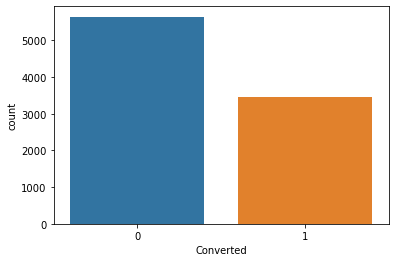

In [74]:
sns.countplot(x='Converted', data=df)
plt.show()

#### Lead conversion rate is 38%

### Identify the continuous and categorical features for further univariate & bivariate analysis

In [75]:
df_num = df.select_dtypes(include=['int64','float64'])
df_cat = df.select_dtypes(include=['object'])

In [76]:
df_num.shape

(9103, 6)

In [77]:
df_cat.shape

(9103, 6)

### Observe the data spread of continuous features with a density plot

In [78]:
df_num.columns

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview'],
      dtype='object')

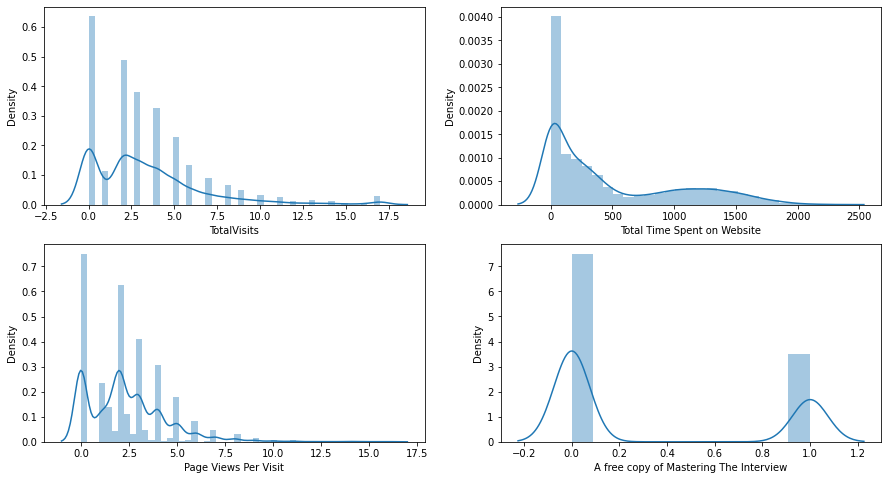

In [79]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.distplot(df['TotalVisits'])
plt.subplot(2,2,2)
sns.distplot(df['Total Time Spent on Website'])
plt.subplot(2,2,3)
sns.distplot(df['Page Views Per Visit'])
plt.subplot(2,2,4)
sns.distplot(df['A free copy of Mastering The Interview'])
plt.show()

### Observe the data spread of categorical features with a density plot

In [80]:
df_cat.columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'City'],
      dtype='object')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

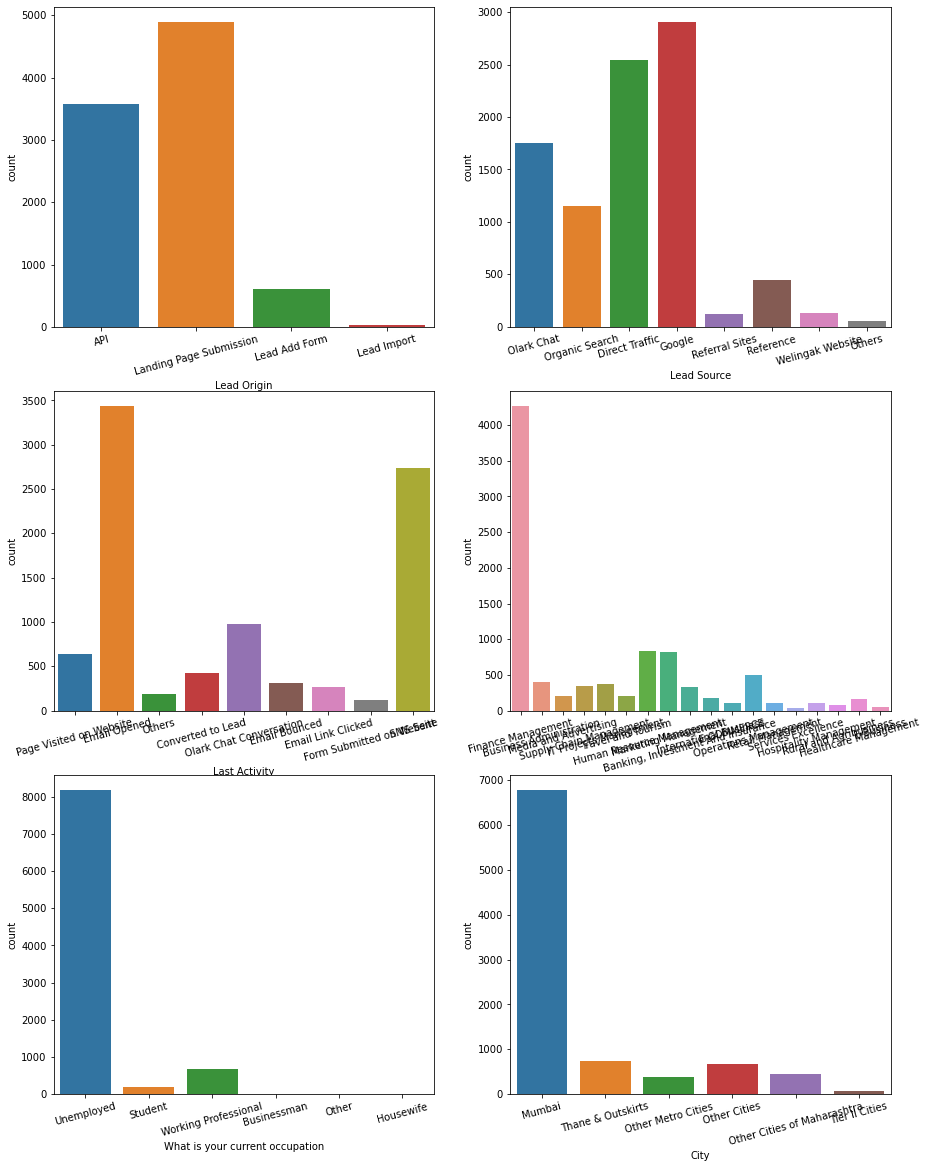

In [81]:
plt.figure(figsize=(15,20))

plt.subplot(3,2,1)
sns.countplot(x='Lead Origin', data=df)
plt.xticks(rotation=15)

plt.subplot(3,2,2)
sns.countplot(x='Lead Source', data=df)
plt.xticks(rotation=15)

plt.subplot(3,2,3)
sns.countplot(x='Last Activity', data=df)
plt.xticks(rotation=15)

plt.subplot(3,2,4)
sns.countplot(x='Specialization', data=df)
plt.xticks(rotation=15)

plt.subplot(3,2,5)
sns.countplot(x='What is your current occupation', data=df)
plt.xticks(rotation=15)

plt.subplot(3,2,6)
sns.countplot(x='City', data=df)
plt.xticks(rotation=15)

## Bivariate Analysis

<Figure size 1080x576 with 0 Axes>

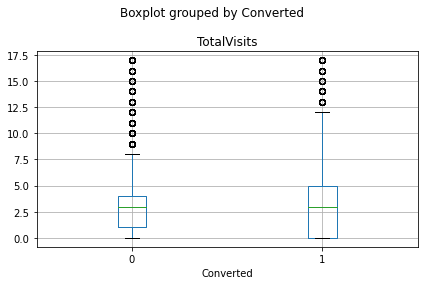

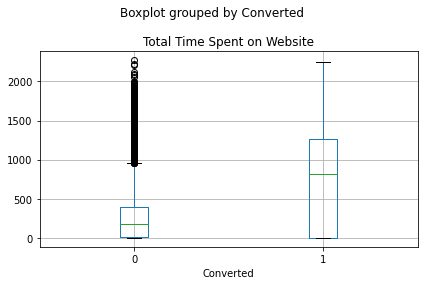

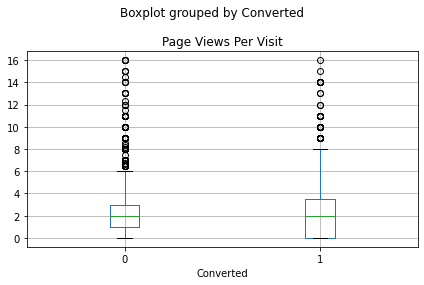

In [82]:
plt.figure(figsize=(15,8))
df.boxplot(column='TotalVisits',by='Converted')
plt.tight_layout()
plt.show()
df.boxplot(column='Total Time Spent on Website',by='Converted')
plt.tight_layout()
plt.show()
df.boxplot(column='Page Views Per Visit',by='Converted')
plt.tight_layout()
plt.show()

### From the above bivariate analysis of continuous features against the target feature 'Converted', the following observations can be made:
- Total Visits are quite higher for the converted deals
- Time Spent on the website is clearly huge for the converted deals
- Pages per visit also quite spead on higher side for the converted deals

### From the above observeraion, we can conclude that, Continous varibles are directly proportional to Target (Lead conversion)

## Now check the conversions for all categorical values


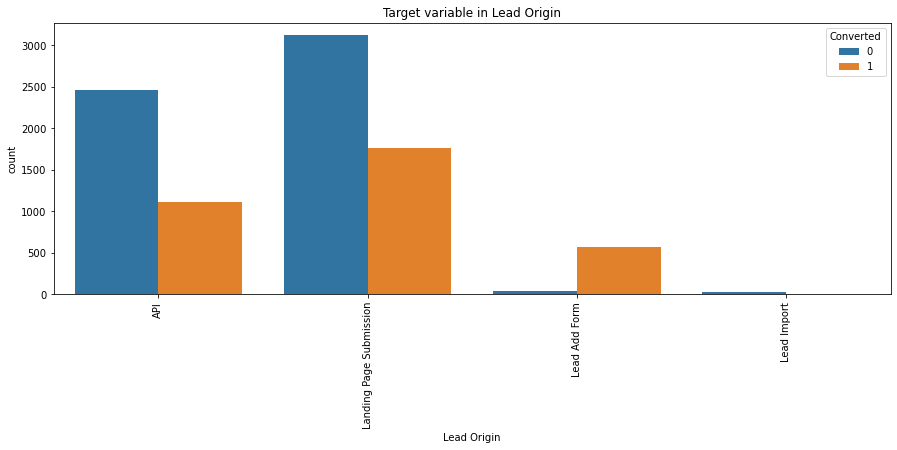

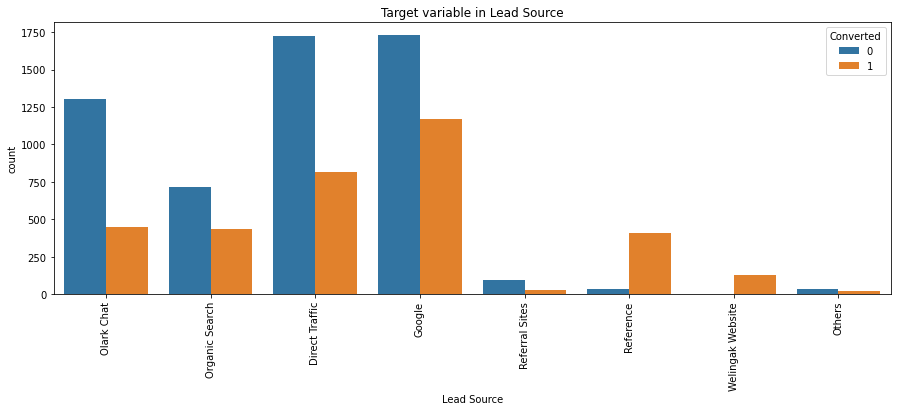

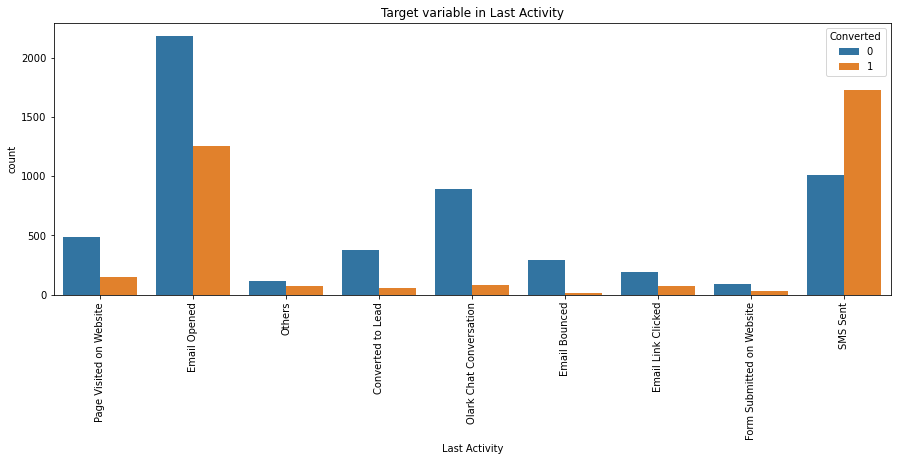

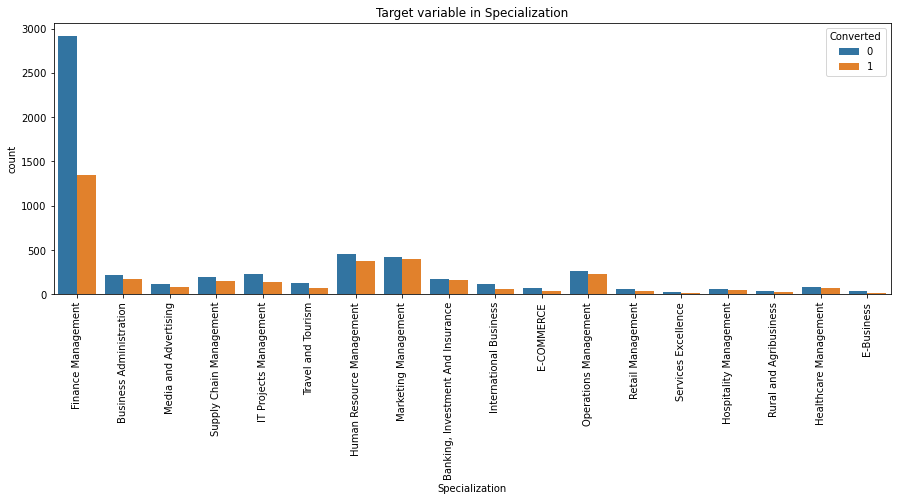

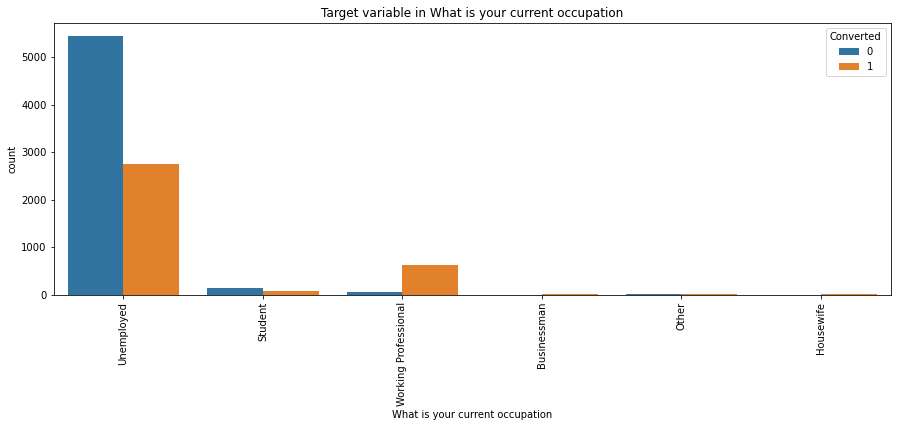

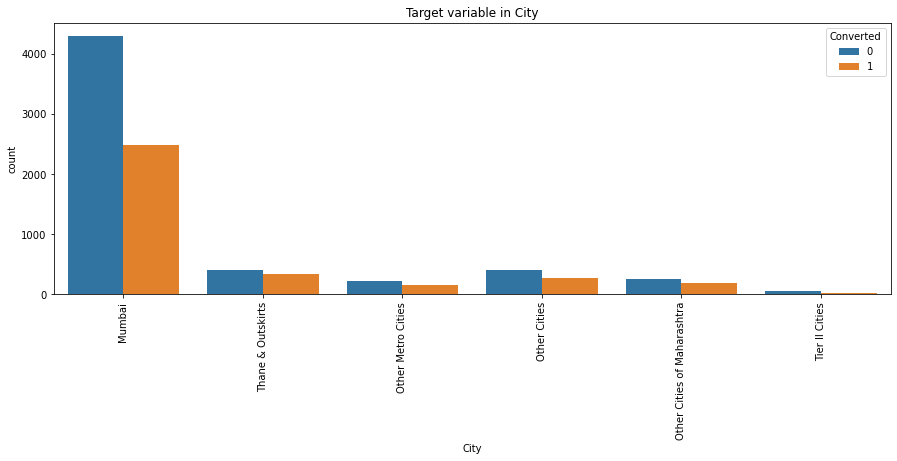

In [83]:
for i in df_cat:
    
    plt.figure(figsize =(15,5))
    sns.countplot(df[i], hue=df.Converted)
    plt.xticks(rotation = 90)
    plt.title('Target variable in'+' '+ i)
    plt.xlabel(i)
    plt.show()

#### Following are the observations of bivariate analysis of categorical features :
- Lead origin of 'Lead Add Form' influences more for conversion of the lead
- 'Welingak Website' and 'References' lead sources are reliable for lead conversion
- 'Reference is  reliable for a lead conversion
- 'SMS Sent' activity is an higher reliable for a lead to be converted
- 'Finance Management' specialization is not leading for a good conversion rate. Working professional are reliable for lead conversion
- 'Unemployed' candidates as expected not ideal candidates for a lead conversion
-  City is not playing any influence in lead conversion

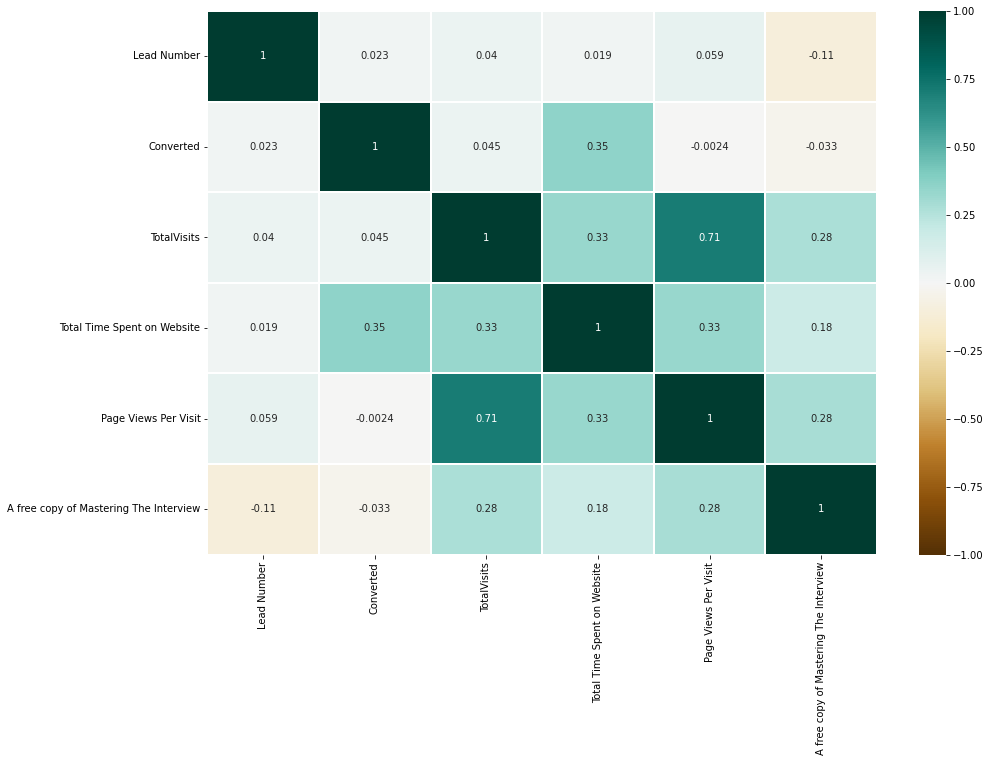

In [84]:
plt.figure(figsize = (15,10))

sns.heatmap(df.corr(), annot=True, cmap="BrBG", robust=True,linewidth=0.1, vmin=-1 )
plt.show()

##### Observation : TotalVisits and Page Views Per Visit are highly correlated. Lets keep both for now and leave it to model to decide which one to hold

## Data Preparation

###### Create the dummy variables for all the categorical variables

In [85]:
dummy = pd.get_dummies(df_cat, drop_first=True)

In [86]:
dummy.shape

(9103, 45)

In [87]:
dummy.describe()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
count,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000
mean,0.536746,0.066791,0.003405,0.318796,0.192574,0.126771,0.005932,0.048665,0.013732,0.014171,0.034274,0.029331,0.377568,0.012743,0.106778,0.021202,0.070306,0.300780,0.043832,0.006262,0.012194,0.468637,0.017247,0.012194,0.092058,0.040207,0.019334,0.090520,0.022190,0.054927,0.010985,0.008019,0.004394,0.038009,0.022190,0.000989,0.001648,0.022740,0.899154,0.074591,0.074701,0.049105,0.041415,0.081951,0.008129
std,0.498675,0.249674,0.058260,0.466035,0.394343,0.332735,0.076796,0.215179,0.116382,0.118203,0.181943,0.168742,0.484805,0.112170,0.308848,0.144064,0.255677,0.458622,0.204732,0.078887,0.109756,0.499043,0.130198,0.109756,0.289123,0.196454,0.137705,0.286941,0.147311,0.227850,0.104240,0.089196,0.066146,0.191230,0.147311,0.031430,0.040562,0.149081,0.301141,0.262744,0.262922,0.216098,0.199259,0.274305,0.089800
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0

In [88]:
df = pd.concat([df,dummy], axis = 1)

In [89]:
df.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,...,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Finance Management,Unemployed,Mumbai,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Finance Management,Unemployed,Mumbai,0,0,0,0,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1,1,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Mumbai,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Finance Management,Unemployed,Mumbai,0,1,0,0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [90]:
#Dropping the original columns which are now duplicates after creating dummy variable columns
df = df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City'],axis =1)

In [91]:
df.shape

(9103, 51)

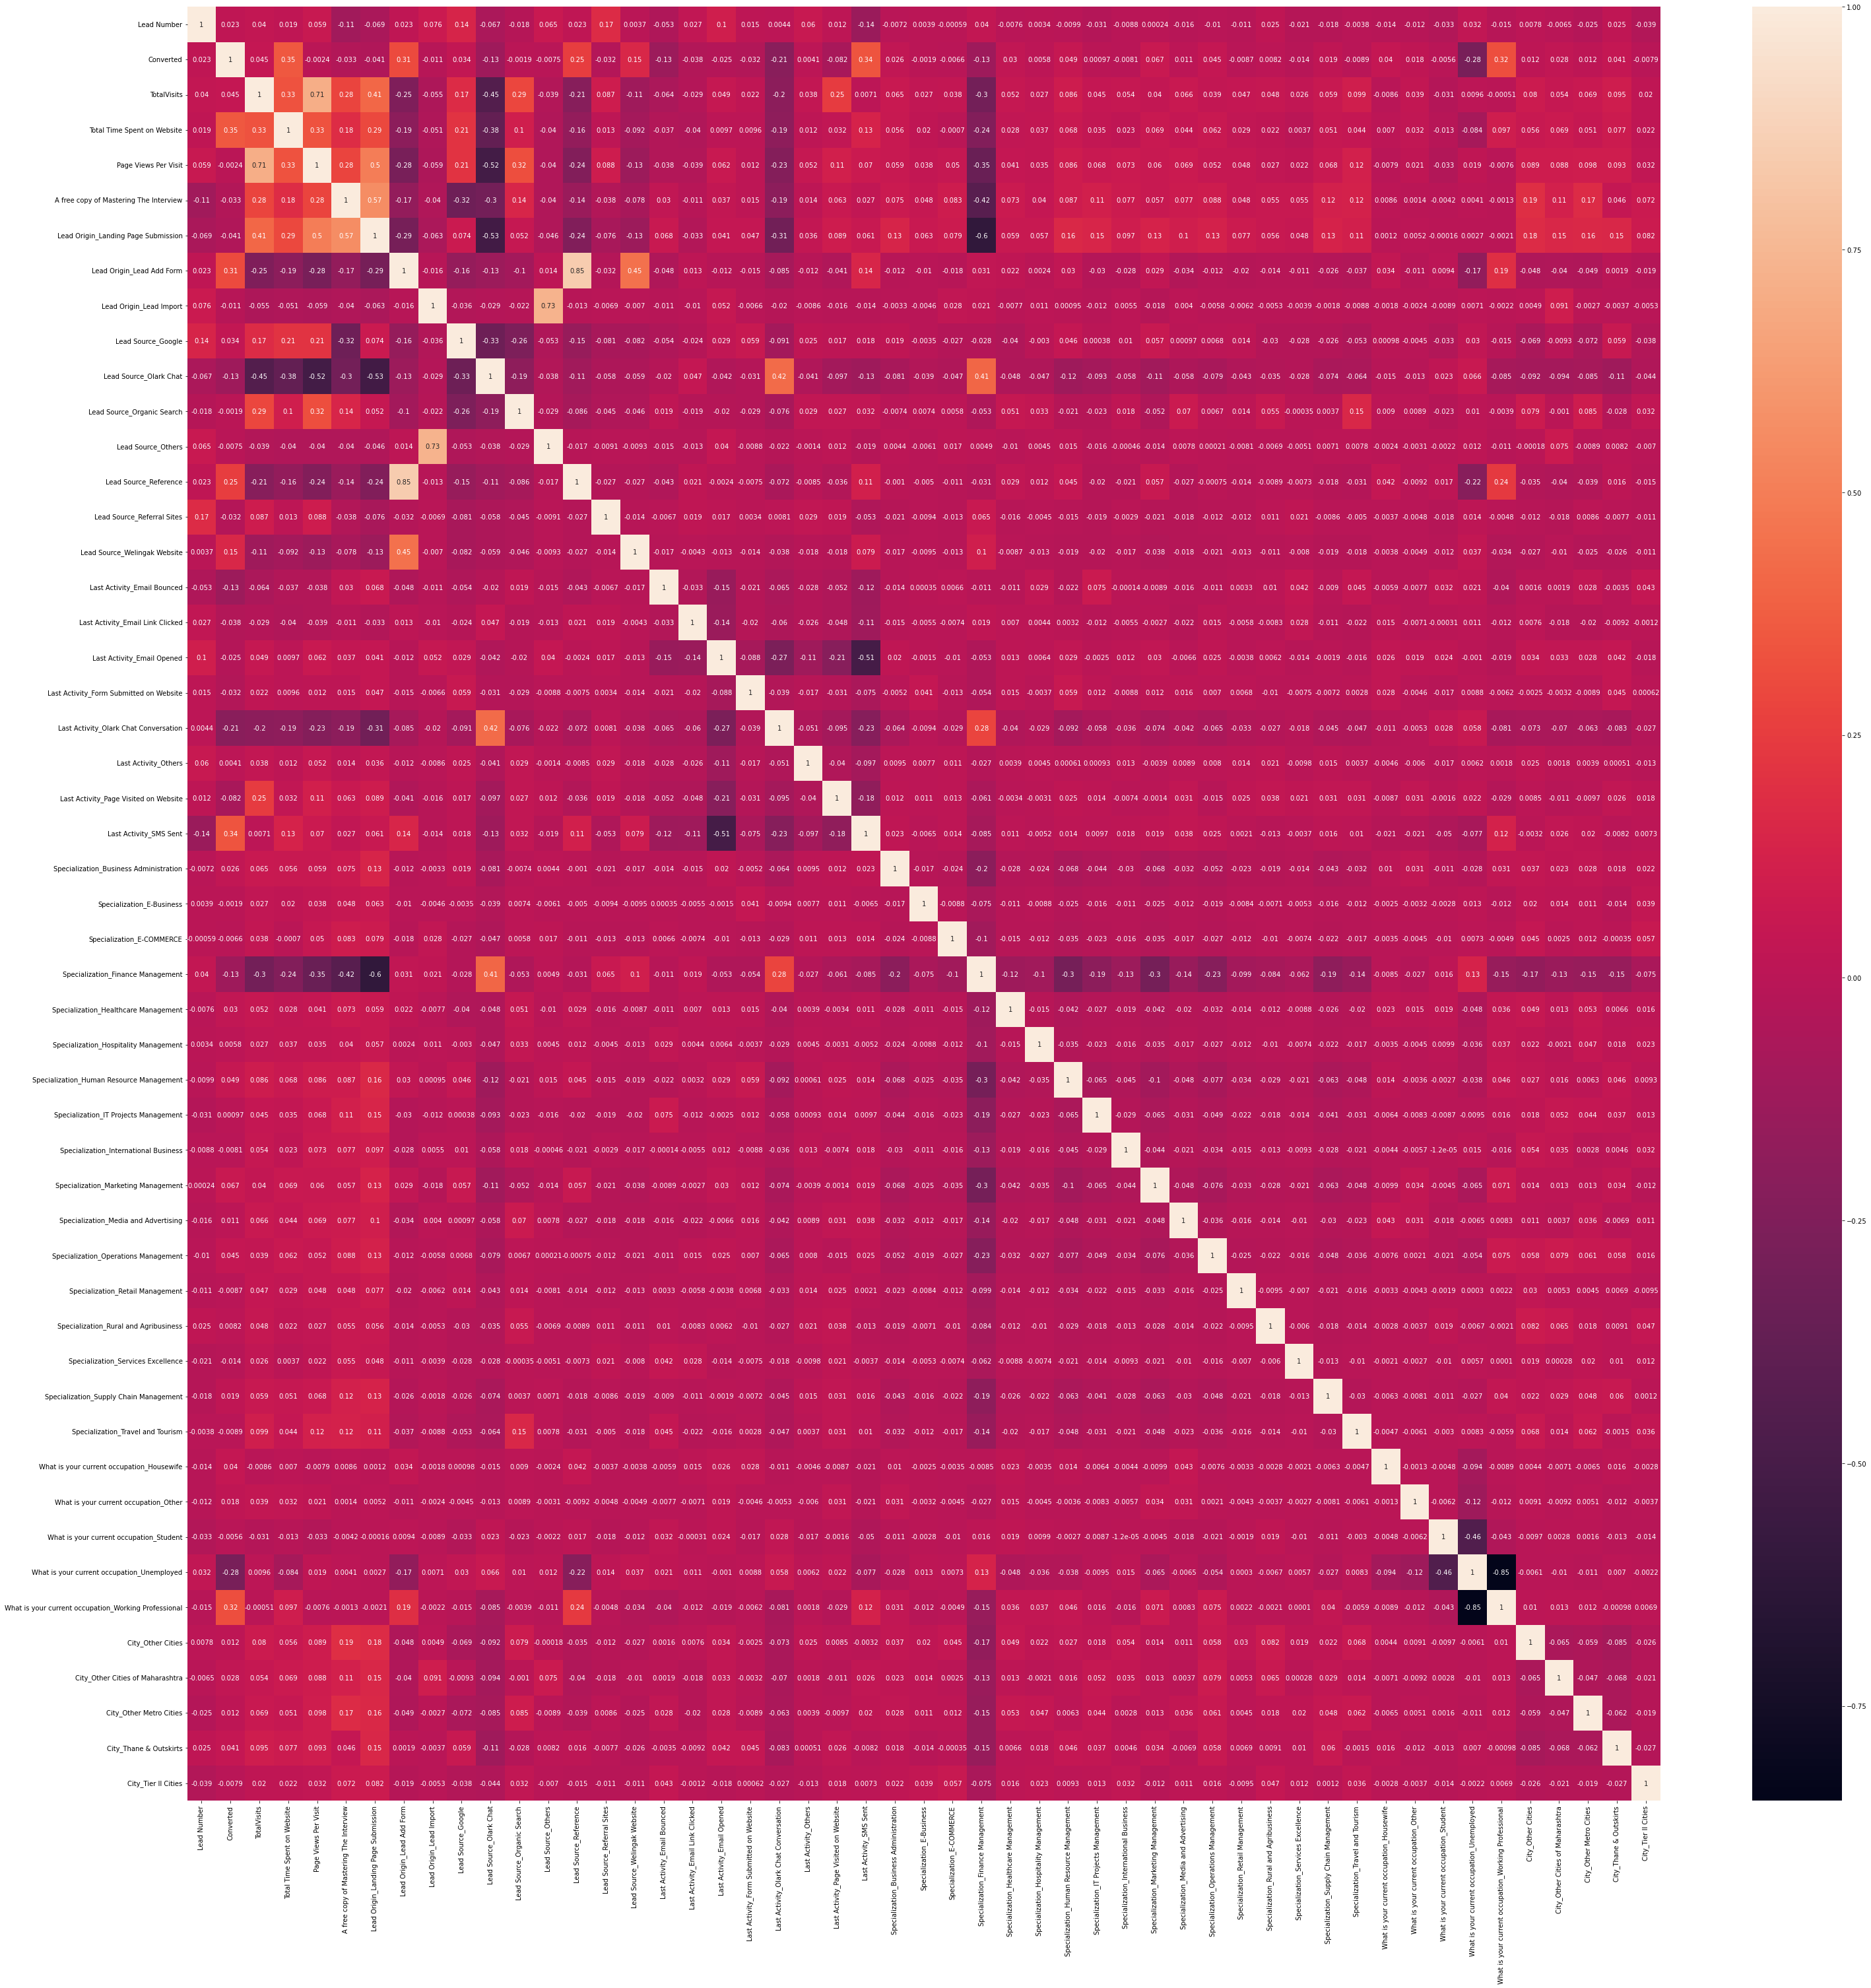

In [92]:
plt.figure(figsize=(50,50))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Number                                           9103 non-null   int64  
 1   Converted                                             9103 non-null   int64  
 2   TotalVisits                                           9103 non-null   float64
 3   Total Time Spent on Website                           9103 non-null   int64  
 4   Page Views Per Visit                                  9103 non-null   float64
 5   A free copy of Mastering The Interview                9103 non-null   int64  
 6   Lead Origin_Landing Page Submission                   9103 non-null   uint8  
 7   Lead Origin_Lead Add Form                             9103 non-null   uint8  
 8   Lead Origin_Lead Import                               9103

In [94]:
df.isnull().sum()

Lead Number                                             0
Converted                                               0
TotalVisits                                             0
Total Time Spent on Website                             0
Page Views Per Visit                                    0
A free copy of Mastering The Interview                  0
Lead Origin_Landing Page Submission                     0
Lead Origin_Lead Add Form                               0
Lead Origin_Lead Import                                 0
Lead Source_Google                                      0
Lead Source_Olark Chat                                  0
Lead Source_Organic Search                              0
Lead Source_Others                                      0
Lead Source_Reference                                   0
Lead Source_Referral Sites                              0
Lead Source_Welingak Website                            0
Last Activity_Email Bounced                             0
Last Activity_

#### All the features in the final dataframe are of numeric type and none of them have any missing values. The data is eligible for the model building.

## Model Building

#### Split the dependent and independent features

In [95]:
X = df.drop('Converted', axis=1)
y = df.Converted

#### Split the data into train and test data with 70-30 ratio
Lets keep the 'Lead Number' as backup as it might be needed at the end for the final prediction

In [96]:
X_train_LN, X_test_LN, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
X_train = X_train_LN.drop('Lead Number', axis=1)
X_test = X_test_LN.drop('Lead Number', axis=1)

#### Perform Feature Scaling on Continous Variables with Standard scaler 

In [97]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
7962,-0.105932,1.476324,-0.410339,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5520,1.113025,-0.771066,2.221081,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1962,0.503547,-0.571257,0.068101,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1566,3.246199,1.393834,0.546541,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9170,-1.020149,-0.881052,-1.127999,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### Data imbalance ratio

In [98]:
(sum(df.Converted) / len(df)) *100

38.02043282434362

#### We have 38% conversion rate

## RFE

### Perform RFE to filter top 15 features to start the model building

In [99]:
logReg = LogisticRegression()
rfe15 = RFE(logReg, 15).fit(X_train, y_train)

In [100]:
list(zip(X_train.columns, rfe15.support_, rfe15.ranking_))

[('TotalVisits', False, 12),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 13),
 ('A free copy of Mastering The Interview', False, 35),
 ('Lead Origin_Landing Page Submission', False, 5),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', False, 15),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 31),
 ('Lead Source_Others', False, 14),
 ('Lead Source_Reference', False, 8),
 ('Lead Source_Referral Sites', False, 17),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 9),
 ('Last Activity_Olark Chat Conversation', False, 3),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 2

In [101]:
col = X_train.columns[rfe15.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Others', 'Last Activity_Page Visited on Website',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [102]:
X_train.columns[~rfe15.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusin

#### Define methods to build a logistic regression model and verifying  VIF(Variance Influence Factor) as these two steps are most common in the iterative procedure of model building

In [103]:
def build_model(X,y):
    X = sm.add_constant(X)
    logit = sm.GLM(y,X,family=sm.families.Binomial()).fit()
    print(logit.summary())
    return logit
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

### Build the first model taking the filtered features of RFE process

## Model 1

In [104]:
cols1 = list(X_train.columns[rfe15.support_])

In [105]:

logit1 = build_model(X_train[cols1], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2729.3
Date:                Tue, 15 Nov 2022   Deviance:                       5458.7
Time:                        22:39:39   Pearson chi2:                 6.74e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [106]:
checkVIF(X_train[cols1])

,Features,VIF
13,What is your current occupation_Unemployed,6.60
7,Last Activity_Email Opened,3.39
10,Last Activity_SMS Sent,3.09
3,Lead Source_Olark Chat,1.61
14,What is your current occupation_Working Profes...,1.61
1,Lead Origin_Lead Add Form,1.57
9,Last Activity_Page Visited on Website,1.48
4,Lead Source_Welingak Website,1.32
0,Total Time Spent on Website,1.29
5,Last Activity_Email Bounced,1.23


#### Drop the column 'What is your current occupation_Housewife' as it is highly insignificant.

In [107]:
cols2 = cols1.copy()
cols2.remove('What is your current occupation_Housewife')

## Model2

In [108]:
logit2 = build_model(X_train[cols2], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2733.0
Date:                Tue, 15 Nov 2022   Deviance:                       5466.0
Time:                        22:39:40   Pearson chi2:                 6.75e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [109]:
checkVIF(X_train[cols2])

,Features,VIF
12,What is your current occupation_Unemployed,6.56
7,Last Activity_Email Opened,3.37
10,Last Activity_SMS Sent,3.08
3,Lead Source_Olark Chat,1.61
13,What is your current occupation_Working Profes...,1.61
1,Lead Origin_Lead Add Form,1.57
9,Last Activity_Page Visited on Website,1.48
4,Lead Source_Welingak Website,1.32
0,Total Time Spent on Website,1.29
5,Last Activity_Email Bounced,1.23


### Drop the column 'What is your current occupation_Unemployed' as it has high VIF

In [110]:
cols3 = cols2.copy()
cols3.remove('What is your current occupation_Unemployed')

## Model3

In [111]:
logit3 = build_model(X_train[cols3], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2738.4
Date:                Tue, 15 Nov 2022   Deviance:                       5476.8
Time:                        22:39:40   Pearson chi2:                 6.75e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [112]:
checkVIF(X_train[cols3])

,Features,VIF
1,Lead Origin_Lead Add Form,1.56
3,Lead Source_Olark Chat,1.33
4,Lead Source_Welingak Website,1.32
0,Total Time Spent on Website,1.29
10,Last Activity_SMS Sent,1.21
7,Last Activity_Email Opened,1.16
12,What is your current occupation_Working Profes...,1.16
2,Lead Origin_Lead Import,1.02
6,Last Activity_Email Link Clicked,1.02
11,What is your current occupation_Student,1.02


### Drop the column 'What is your current occupation_Student' as it significatly high pvalue

In [113]:
cols4 = cols3.copy()
cols4.remove('What is your current occupation_Student')

## Model 4

In [114]:
logit4 = build_model(X_train[cols4], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2740.0
Date:                Tue, 15 Nov 2022   Deviance:                       5479.9
Time:                        22:39:40   Pearson chi2:                 6.75e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [115]:
checkVIF(X_train[cols4])

,Features,VIF
1,Lead Origin_Lead Add Form,1.56
3,Lead Source_Olark Chat,1.33
4,Lead Source_Welingak Website,1.32
0,Total Time Spent on Website,1.29
10,Last Activity_SMS Sent,1.21
11,What is your current occupation_Working Profes...,1.16
7,Last Activity_Email Opened,1.15
2,Lead Origin_Lead Import,1.02
6,Last Activity_Email Link Clicked,1.02
5,Last Activity_Email Bounced,1.01


### Drop Last Activity_Email Bounced feature as it has sighly high P value

In [116]:
cols5 = cols4.copy()
cols5.remove('Last Activity_Email Bounced')

# Model 5

In [117]:
logit5 = build_model(X_train[cols5], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6360
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2742.6
Date:                Tue, 15 Nov 2022   Deviance:                       5485.2
Time:                        22:39:40   Pearson chi2:                 6.74e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [118]:
checkVIF(X_train[cols5])

,Features,VIF
1,Lead Origin_Lead Add Form,1.56
3,Lead Source_Olark Chat,1.32
4,Lead Source_Welingak Website,1.32
0,Total Time Spent on Website,1.29
9,Last Activity_SMS Sent,1.21
10,What is your current occupation_Working Profes...,1.16
6,Last Activity_Email Opened,1.15
2,Lead Origin_Lead Import,1.02
5,Last Activity_Email Link Clicked,1.02
8,Last Activity_Page Visited on Website,1.01


## This model - Model 5 has all the variables significant (p-value is 5% or lesser) and the VIFs are under 2 for all variables. This is our final model.

##  Make predictions on the train data

In [119]:
y_train_pred = logit5.predict(sm.add_constant(X_train[cols5]))

In [120]:
y_train_pred[:11]

7962    0.806270
5520    0.105430
1962    0.293624
1566    0.959403
9170    0.246573
5097    0.246573
8954    0.394550
309     0.151921
5519    0.479677
1050    0.496001
5246    0.368281
dtype: float64

In [121]:
y_train_pred = y_train_pred.values.reshape(-1)

### Create a dataframe with unique identifier 'Lead Number', Target column 'Converted' and the Predicted Probability

In [122]:
y_train_pred_final = pd.DataFrame({'Lead Number':X_train_LN['Lead Number'].values,'Converted':y_train.values,'Conv_Probability':y_train_pred})
y_train_pred_final.head()

,Lead Number,Converted,Conv_Probability
0,588794,0,0.806270
1,607556,0,0.105430
2,640629,0,0.293624
3,643916,1,0.959403
4,580141,0,0.246573


### Initially, lets assume the probability 0.5 as cutoff to determine the lead conversion with the predicted probability

In [123]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conv_Probability.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

,Lead Number,Converted,Conv_Probability,Predicted
0,588794,0,0.806270,1
1,607556,0,0.105430,0
2,640629,0,0.293624,0
3,643916,1,0.959403,1
4,580141,0,0.246573,0


## Metric Evaluation

#### Find Accuracy, Precision and Recall metric

In [124]:
accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8025737602008789

In [125]:
confusion = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion

array([[3547,  406],
       [ 852, 1567]], dtype=int64)

In [126]:
sens = confusion[1,1] / (confusion[1,1] + confusion[1,0])
sens

0.6477883422902025

In [127]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7942219969589458

In [128]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.6477883422902025

### Precision Recall Curve

In [129]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conv_Probability)

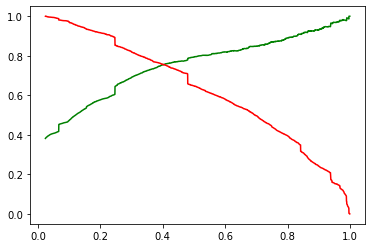

In [130]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")

plt.show()

####  From the above precision recall tradeoff curve, the probability cutoff 0.4 seems to be an ideal pick
Let's predict the Lead Conversion with the 0.4 cutoff and re-evaluate the metrics

In [131]:
y_train_pred_final['Predicted_PR'] = y_train_pred_final.Conv_Probability.map(lambda x: 1 if x>0.4 else 0)
y_train_pred_final.head()

,Lead Number,Converted,Conv_Probability,Predicted,Predicted_PR
0,588794,0,0.806270,1,1
1,607556,0,0.105430,0,0
2,640629,0,0.293624,0,0
3,643916,1,0.959403,1,1
4,580141,0,0.246573,0,0


### Recompute Accuracy, Precision and Recall Metrics

In [132]:
acc_PR = accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_PR)
acc_PR

0.8145009416195856

In [133]:
prec_PR = precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_PR)
prec_PR

0.7550515463917525

In [134]:
recall_PR = recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_PR)
recall_PR

0.756924348904506

### Metrics out of Confusion Matrix (Sensitivity, Specificity etc)

#### Let's also evaluate the confusion matrix and corresponding metrics

In [135]:
cm_pr = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted_PR)
cm_pr

array([[3359,  594],
       [ 588, 1831]], dtype=int64)

#### Sensitivity or True Positive Rate (TPR) : The number of positives predicted correctly out of the actual positives

In [136]:
sensitivity_PR = cm_pr[1,1]/(cm_pr[1,0]+cm_pr[1,1])
sensitivity_PR

0.756924348904506

#### Specificity : The number of negatives predicted correctly out of the actual negatives

In [137]:
specificity_PR = cm_pr[0,0]/(cm_pr[0,0]+cm_pr[0,1])
specificity_PR

0.8497343789526941

#### Positive Predictive Value or Precision : Number of positives correctly predicted out of the total positives that are predicted

In [138]:
PPV_PR = cm_pr[1,1] / (cm_pr[1,1] + cm_pr[0,1])
PPV_PR

0.7550515463917525

#### False Positive Rate : Predicting as positive when it is not (1-Specifity)

In [139]:
FPR_PR = cm_pr[0,1] / (cm_pr[0,1] + cm_pr[0,0])
FPR_PR

0.15026562104730584

#### Negative Predictive Value : Number of negatives correctly predicted out of the total negatives that are predicted

In [140]:
NPV_PR = cm_pr[0,0] / (cm_pr[0,0] + cm_pr[1,0])
NPV_PR

0.8510260957689384

### Receiver Operating Characteristic Curve (ROC Curve)

In [141]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC Curve Area = %0.2f' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

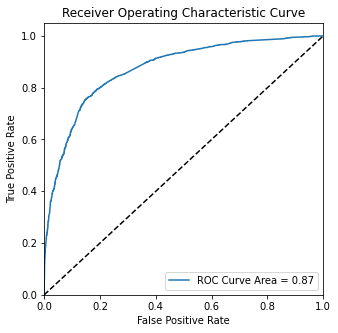

In [142]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conv_Probability)

#### The ROC area of 0.87 indicates significantly a good model

#### Identify the prediction for all probabilities from 0.0 to 0.9 and later to see the trade-off between Sensitivity and Specificity for all the probabilities to arrive at an optimal cutoff probability

In [143]:
nums = [float(x)/10 for x in range(10)]
for i in nums:
    y_train_pred_final[i]= y_train_pred_final.Conv_Probability.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Lead Number,Converted,Conv_Probability,Predicted,Predicted_PR,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,588794,0,0.806270,1,1,1,1,1,1,1,1,1,1,1,0
1,607556,0,0.105430,0,0,1,1,0,0,0,0,0,0,0,0
2,640629,0,0.293624,0,0,1,1,1,0,0,0,0,0,0,0
3,643916,1,0.959403,1,1,1,1,1,1,1,1,1,1,1,1
4,580141,0,0.246573,0,0,1,1,1,0,0,0,0,0,0,0


### Identify the metrics accuracy, sensitivity & specifity for all the different predictions

In [144]:
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity', 'Precision', 'Recall'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total=sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    
    specificity = cm[0,0]/(cm[0,0]+cm[0,1])
    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    prec = precision_score(y_train_pred_final.Converted, y_train_pred_final[i])
    recall = recall_score(y_train_pred_final.Converted, y_train_pred_final[i])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity, prec, recall]
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificity  Precision    Recall
0.0          0.0  0.379630     1.000000     0.000000   0.379630  1.000000
0.1          0.1  0.578311     0.970236     0.338477   0.472995  0.970236
0.2          0.2  0.713748     0.916494     0.589679   0.577494  0.916494
0.3          0.3  0.792687     0.818933     0.776625   0.691690  0.818933
0.4          0.4  0.814501     0.756924     0.849734   0.755052  0.756924
0.5          0.5  0.802574     0.647788     0.897293   0.794222  0.647788
0.6          0.6  0.792059     0.579992     0.921832   0.819509  0.579992
0.7          0.7  0.775581     0.496900     0.946117   0.849470  0.496900
0.8          0.8  0.751883     0.394791     0.970402   0.890858  0.394791
0.9          0.9  0.705273     0.241422     0.989122   0.931419  0.241422


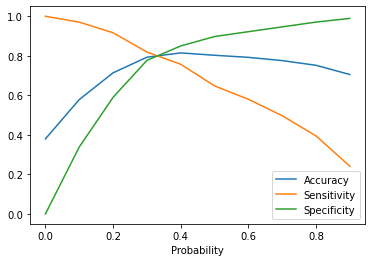

In [145]:
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

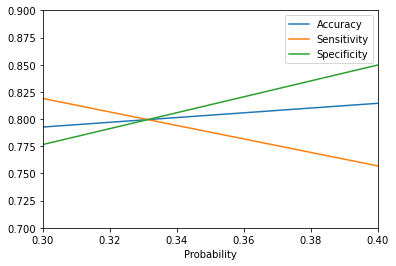

In [146]:
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.xlim([0.3,0.4])
plt.ylim([0.7,0.9])
plt.show()

#### From the above Sensitivity-Specificity tradeoff curve, it seems to be 0.33 might be an optimal cutoff.

In [147]:
y_train_pred_final['Predicted_final'] = y_train_pred_final.Conv_Probability.map( lambda x: 1 if x > 0.33 else 0)
y_train_pred_final.head()

,Lead Number,Converted,Conv_Probability,Predicted,Predicted_PR,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted_final
0,588794,0,0.806270,1,1,1,1,1,1,1,1,1,1,1,0,1
1,607556,0,0.105430,0,0,1,1,0,0,0,0,0,0,0,0,0
2,640629,0,0.293624,0,0,1,1,1,0,0,0,0,0,0,0,0
3,643916,1,0.959403,1,1,1,1,1,1,1,1,1,1,1,1,1
4,580141,0,0.246573,0,0,1,1,1,0,0,0,0,0,0,0,0


#### Compute Accuracy, Sensitivity, Specificity metrics

In [148]:
acc = accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_final)
acc

0.8010043942247332

In [149]:
cm = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted_final)
cm

array([[3173,  780],
       [ 488, 1931]], dtype=int64)

#### Sensitivity or True Positive Rate (TPR)

In [150]:
sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
sensitivity

0.7982637453493179

#### Specificity

In [151]:
specificity = cm[0,0]/(cm[0,0]+cm[0,1])
specificity

0.802681507715659

#### Positive Predictive Value or Precision

In [152]:
PPV = cm[1,1] / (cm[1,1] + cm[0,1])
PPV

0.7122832902987828

#### False Positive Rate

In [153]:
FPR = cm[0,1] / (cm[0,1] + cm[0,0])
FPR

0.197318492284341

#### Negative Predictive Value

In [154]:
NPV = cm[0,0] / (cm[0,0] + cm[1,0])
NPV

0.8667030865883638

#### Compute Precision and Recall for the new cutoff

In [155]:
prec = precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_final)
prec

0.7122832902987828

In [156]:
recall = recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_final)
recall

0.7982637453493179

#### Formulate a table with all the metrics for both the cutoffs 0.40 and 0.33 to clear identify which to finalize

In [157]:
Metrics_Compare = pd.DataFrame( columns = ['Metric','Precision_Recall_0.40','Sens_Spec_0.33'])
Metrics_Compare.loc[0] =['Accuracy', acc_PR, acc]
Metrics_Compare.loc[1] =['Sensitivity', sensitivity_PR, sensitivity]
Metrics_Compare.loc[2] =['Specificity', specificity_PR, specificity]
Metrics_Compare.loc[3] =['Precision', prec_PR, prec]
Metrics_Compare.loc[4] =['Recall', recall_PR, recall]
Metrics_Compare.loc[5] =['Negative Predictive Value', NPV_PR, NPV]
Metrics_Compare.loc[6] =['False Positive Rate', FPR_PR, FPR]

Metrics_Compare['Difference'] = (Metrics_Compare['Precision_Recall_0.40'] - Metrics_Compare['Sens_Spec_0.33'])

Metrics_Compare

,Metric,Precision_Recall_0.40,Sens_Spec_0.33,Difference
0,Accuracy,0.814501,0.801004,0.013497
1,Sensitivity,0.756924,0.798264,-0.041339
2,Specificity,0.849734,0.802682,0.047053
3,Precision,0.755052,0.712283,0.042768
4,Recall,0.756924,0.798264,-0.041339
5,Negative Predictive Value,0.851026,0.866703,-0.015677
6,False Positive Rate,0.150266,0.197318,-0.047053


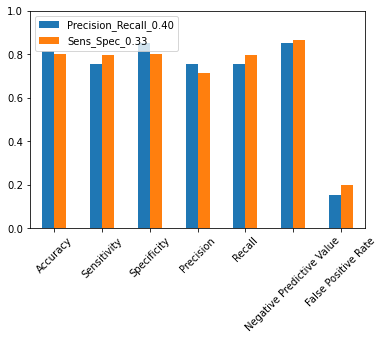

In [158]:
Metrics_Compare[['Metric','Precision_Recall_0.40','Sens_Spec_0.33']].plot.bar()
plt.ylim([0,1])
plt.xticks((0,1,2,3,4,5,6), Metrics_Compare.Metric, rotation=45)
plt.show()

#### Though both the cutoffs have very close metric values, as we need to target the high Recall, lets stick to the cutoff 0.33

## Making predictions on the test data

#### Scale the test data (the same continuous columns) as well using the same scaler instance

In [159]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(
    X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [160]:
X_test_sm = X_test[cols5]
X_test_sm = sm.add_constant(X_test_sm)

In [161]:
X_test_sm.shape

(2731, 12)

In [162]:
y_test_pred = logit5.predict(X_test_sm)

In [163]:
y_test_pred[:12]

3504    0.199799
4050    0.937313
7201    0.560227
1196    0.199469
8219    0.085638
8747    0.246573
9048    0.788233
6524    0.031315
7693    0.284302
8187    0.937313
3559    0.155219
6940    0.066513
dtype: float64

In [164]:
y_test_pred = y_test_pred.values.reshape(-1)

#### Create a dataframe with unique identifier 'Lead Number', Target column 'Converted' and the Predicted Probability

In [165]:
y_test_pred_final = pd.DataFrame({'Lead Number':X_test_LN['Lead Number'].values,'Converted':y_test.values, 'Conv_Probability':y_test_pred})
y_test_pred_final.head()

,Lead Number,Converted,Conv_Probability
0,626930,0,0.199799
1,621198,1,0.937313
2,594161,0,0.560227
3,647285,0,0.199469
4,587146,1,0.085638


### As finalized the probability cutoff as 0.33, lets make predictions with the same cutoff

In [166]:
y_test_pred_final['Predicted'] = y_test_pred_final.Conv_Probability.map( lambda x: 1 if x > 0.33 else 0)
y_test_pred_final.head()

,Lead Number,Converted,Conv_Probability,Predicted
0,626930,0,0.199799,0
1,621198,1,0.937313,1
2,594161,0,0.560227,1
3,647285,0,0.199469,0
4,587146,1,0.085638,0


#### Metric Evaluation on Test Data

#### Confusion Matrix

In [167]:
cm_test = confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.Predicted)
cm_test

array([[1350,  339],
       [ 203,  839]], dtype=int64)

#### Accuracy on test data

In [168]:
acc_test = accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Predicted)
acc_test

0.8015378982057855

#### Sensitivity

In [169]:
sensitivity_test = cm_test[1,1] / (cm_test[1,0] + cm_test[1,1])
sensitivity_test

0.8051823416506718

#### Specificity

In [170]:
specificity_test = cm_test[0,0] / (cm_test[0,0] + cm_test[0,1])
specificity_test

0.7992895204262878

#### Positive Predictive Value or Precision

In [171]:
PPV_test = cm_test[1,1] / (cm_test[1,1] + cm_test[0,1])
PPV_test

0.7122241086587436

#### False Positive Rate

In [172]:
FPR_test = cm_test[0,1] / (cm_test[0,1] + cm_test[0,0])
FPR_test

0.20071047957371227

#### Negative Predictive Value

In [173]:
NPV_test = cm_test[0,0] / (cm_test[0,0] + cm_test[1,0])
NPV_test

0.8692852543464262

#### Evaluate Precision and Recall

In [174]:
prec_test = precision_score(y_test_pred_final.Converted, y_test_pred_final.Predicted)
prec_test

0.7122241086587436

In [175]:
recall_test = recall_score(y_test_pred_final.Converted, y_test_pred_final.Predicted)
recall_test

0.8051823416506718

### Create a table with all the metrics on train & test data respectively to clearly understand how it varies

In [176]:
Metrics_Compare = pd.DataFrame( columns = ['Metric','Train Data','Test Data'])
Metrics_Compare.loc[0] =['Accuracy', acc, acc_test]
Metrics_Compare.loc[1] =['Sensitivity', sensitivity, sensitivity_test]
Metrics_Compare.loc[2] =['Specificity', specificity, specificity_test]
Metrics_Compare.loc[3] =['Precision', prec, prec_test]
Metrics_Compare.loc[4] =['Recall', recall, recall_test]
Metrics_Compare.loc[5] =['Negative Predictive Value', NPV, NPV_test]
Metrics_Compare.loc[6] =['False Positive Rate', FPR, FPR_test]

Metrics_Compare['Difference'] = Metrics_Compare['Train Data'] - Metrics_Compare['Test Data']

Metrics_Compare

,Metric,Train Data,Test Data,Difference
0,Accuracy,0.801004,0.801538,-0.000534
1,Sensitivity,0.798264,0.805182,-0.006919
2,Specificity,0.802682,0.799290,0.003392
3,Precision,0.712283,0.712224,0.000059
4,Recall,0.798264,0.805182,-0.006919
5,Negative Predictive Value,0.866703,0.869285,-0.002582
6,False Positive Rate,0.197318,0.200710,-0.003392


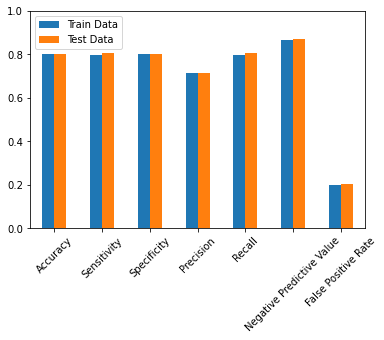

In [177]:
Metrics_Compare[['Metric','Train Data','Test Data']].plot.bar()
plt.ylim([0,1])
plt.xticks((0,1,2,3,4,5,6), Metrics_Compare.Metric, rotation=45)
plt.show()

#### Assigning Lead Score to all the leads

In [178]:
y_train_pred_to_merge = y_train_pred_final[['Lead Number', 'Conv_Probability', 'Predicted_final']]
y_train_pred_to_merge.columns = ['Lead Number', 'Conv_Probability', 'Predicted']
y_train_pred_to_merge.shape

(6372, 3)

In [179]:
y_test_pred_to_merge = y_test_pred_final.drop('Converted', axis=1)
y_test_pred_to_merge.shape

(2731, 3)

In [180]:
df_pred_final = pd.concat([y_train_pred_to_merge, y_test_pred_to_merge], axis=0)
df_pred_final.head()

,Lead Number,Conv_Probability,Predicted
0,588794,0.806270,1
1,607556,0.105430,0
2,640629,0.293624,0
3,643916,0.959403,1
4,580141,0.246573,0


In [181]:
df_pred_final['Lead Score'] = round(100 * df_pred_final['Conv_Probability'])
df_pred_final.head()

,Lead Number,Conv_Probability,Predicted,Lead Score
0,588794,0.806270,1,81.0
1,607556,0.105430,0,11.0
2,640629,0.293624,0,29.0
3,643916,0.959403,1,96.0
4,580141,0.246573,0,25.0


In [182]:
df_final = pd.merge(df, df_pred_final, how='inner', on='Lead Number')
df_final.drop('Conv_Probability', axis=1, inplace=True)
df_final.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,...,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Predicted,Lead Score
0,660737,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,15.0
1,660728,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,29.0
2,660727,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,71.0
3,660719,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,20.0
4,660681,1,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,30.0


##  Metrics on whole dataframe

In [183]:
cm_f = confusion_matrix(df_final.Converted, df_final.Predicted)

In [184]:
accuracy_score(df_final.Converted, df_final.Predicted)

0.8011644512797979

In [185]:
precision_score(df_final.Converted, df_final.Predicted)

0.7122653638467472

In [186]:
sen_f = cm_f[1,1] / (cm_f[1,0] + cm_f[1,1])
sen_f

0.8003467206009823

In [187]:
recall_score(df_final.Converted, df_final.Predicted)


0.8003467206009823